In [1]:
!pip install rdflib

In [2]:
import rdflib
import pandas as pd 

g = rdflib.Graph()
g.parse('data-1152.rdf')
g.parse('data-1154.rdf')
g.parse('data-1204.rdf')
g.parse('data-1205.rdf')
g.parse('data-1538.rdf')

# g.parse('Incident Response.rdf')


<Graph identifier=N8be0425f34c24a96aae6b1d586743952 (<class 'rdflib.graph.Graph'>)>

In [3]:
#population by state

qres = g.query(
    """
    PREFIX fiftyone:<http://data-gov.tw.rpi.edu/vocab/p/1152/>
    PREFIX fiftyfour:<http://data-gov.tw.rpi.edu/vocab/p/1154/>

    SELECT ?state ?veteran_population_1 ?veteran_population_2
 WHERE { 
    {
        SELECT ?state (sum(xsd:decimal(?vp1152)) AS ?veteran_population_1) 
    	WHERE {
            ?s fiftyone:veteran_population ?vp1152. 
            ?s fiftyone:state ?state.
        } group by ?state order by ?state
    }
    {
        SELECT ?state_abb (sum(xsd:decimal(?vp1154)) AS ?veteran_population_2) 
    	WHERE {
            ?s fiftyfour:veteran_population ?vp1154. 
            ?s fiftyfour:state ?state1.
            bind( substr( ?state1, 1, 2 ) as ?state_abb )
        } group by ?state_abb order by ?state_abb
    }
  FILTER (?state = ?state_abb) 
} """)

result=[]
for row in qres:
    result.append([row[0],row[1],row[2]])
out=[[0 for _ in range(len(result[0]))] for _ in range(len(result)+1)]
out[0]=['State','VetPop1','VetPop2']
for i in range(len(result)):
            result[i] = list(result[i])
            for j in range(len(result[i])):
                    out[i+1][j] = str(result[i][j])
print(out)

[['State', 'VetPop1', 'VetPop2'], ['AL', '416947.01', '489175.65'], ['AR', '262374.31', '824869.72'], ['CA', '2131939.08', '2078267.32'], ['CO', '427705.75', '671804.62'], ['DE', '80592.24', '79915.54'], ['FL', '1746538.64', '1715114.43'], ['ID', '137151.92', '137202.81'], ['IL', '841679.51', '822104.21'], ['IN', '517763.74', '509313.43'], ['MA', '440900.67', '1047299.27'], ['MI', '761308.06', '1877022.25'], ['MO', '530799.02', '103729.64'], ['NE', '152842.93', '2216150.28'], ['OH', '957889.22', '935439.96'], ['OK', '338085.85', '333876.75'], ['OR', '351697.10', '345872.65'], ['UT', '157011.77', '156107.42'], ['WA', '643302.18', '640418.65'], ['WI', '446414.70', '436957.81'], ['WY', '56124.83', '56140.63']]


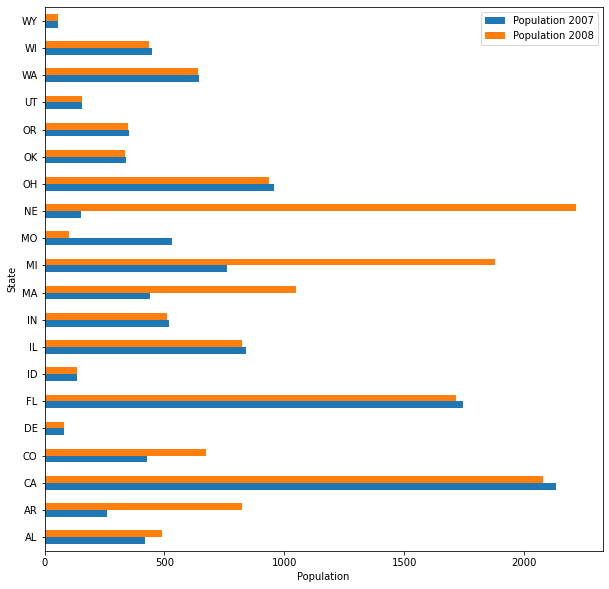

In [4]:
df = pd.DataFrame(out[1:], columns = ['State','Pop 2007','Pop 2008'])
df['Population 2007'] = df['Pop 2007'].astype(float).astype(int).div(1000)
df['Population 2008'] = df['Pop 2008'].astype(float).astype(int).div(1000)

df.set_index(['State'], inplace=True)
ax=df.plot.barh(figsize=(10,10))
ax.set_xlabel("Population")

ax.figure.savefig('vetPopulation.jpg')


In [5]:
#
qres = g.query(
    """
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    PREFIX fiftytwo:<http://data-gov.tw.rpi.edu/vocab/p/1152/>
    PREFIX fiftyfour:<http://data-gov.tw.rpi.edu/vocab/p/1154/>
    SELECT ?state ?exp_year1 ?exp_year2
     WHERE { 
        {
            SELECT ?state (sum(xsd:decimal(?exp_yr1)) AS ?exp_year1) 
            WHERE {
                ?s fiftytwo:total_expenditure ?exp_yr1. 
                ?s fiftytwo:state ?state.

            } group by ?state order by ?state
        }
        {
            SELECT ?state_abb (sum(xsd:decimal(?exp_yr2)) AS ?exp_year2) 
            WHERE {
                ?s fiftyfour:total_expenditure ?exp_yr2. 
                ?s fiftyfour:state ?state1.
                bind( substr( ?state1, 1, 2 ) as ?state_abb )
            } group by ?state_abb order by ?state_abb
        }
      FILTER (?state = ?state_abb) 
    }
 """)
result=[]
for row in qres:
    result.append([row[0],row[1],row[2]])
out=[[0 for _ in range(len(result[0]))] for _ in range(len(result)+1)]
out[0]=['State','Exp1','Exp2']
for i in range(len(result)):
            result[i] = list(result[i])
            for j in range(len(result[i])):
                    out[i+1][j] = str(result[i][j])
print(out)

[['State', 'Exp1', 'Exp2'], ['AL', '1534602.94', '1992672.12'], ['AR', '1198760.20', '3194669.32'], ['CA', '6563257.42', '7152712.16'], ['CO', '1188979.20', '2068393.93'], ['DE', '188186.11', '213192.64'], ['FL', '5684838.64', '6342117.52'], ['ID', '403660.73', '458679.43'], ['IL', '2210728.80', '2398755.55'], ['IN', '1215536.62', '1387013.63'], ['MA', '1420023.02', '3491238.34'], ['MI', '1679508.52', '6134875.06'], ['MO', '1567041.79', '394343.16'], ['NE', '516322.95', '7768885.89'], ['OH', '2970791.02', '3503208.26'], ['OK', '1452479.80', '1625516.37'], ['OR', '1239452.47', '1369120.53'], ['UT', '446917.08', '508229.23'], ['WA', '1782903.73', '2012165.15'], ['WI', '1282246.74', '1457734.64'], ['WY', '192589.23', '216217.90']]


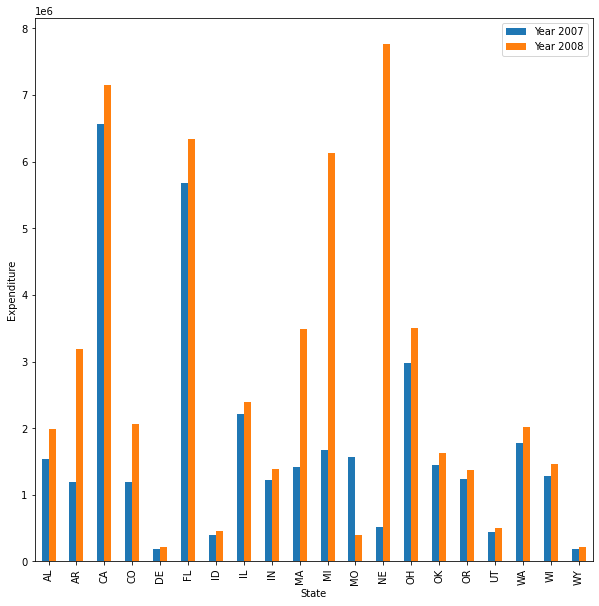

In [6]:
df = pd.DataFrame(out[1:], columns = ['State','Year 2007','Year 2008'])
df['Year 2007'] = df['Year 2007'].astype(float).astype(int)
df['Year 2008'] = df['Year 2008'].astype(float).astype(int)

df.set_index(['State'], inplace=True)
ax=df.plot.bar(figsize=(10,10))
ax.set_ylabel("Expenditure")
ax.figure.savefig('vetExp.jpg')


In [7]:
#veterans by age
qres = g.query(
    """
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    
    SELECT  ?state (SUM(?age35to441) AS ?betweenageof35and44) (SUM(?age45to541) AS
  ?agebetween45and54) (SUM(?age55to641) AS ?agebetween55and64)
(SUM(?age65to741) AS ?agebetween65and74)
    WHERE {
    ?s <http://data-gov.tw.rpi.edu/vocab/p/1538/state> ?state.
    
    ?s <http://data-gov.tw.rpi.edu/vocab/p/1538/age_35_44_c_p> ?age35to44.
    BIND(IF(?age35to44 = "*", 0, xsd:integer(?age35to44)) as ?age35to441)

    ?s <http://data-gov.tw.rpi.edu/vocab/p/1538/age_45_54_c_p> ?age45to54.
        BIND(IF(?age45to54 = "*", 0, xsd:integer(?age45to54)) as ?age45to541)

    ?s <http://data-gov.tw.rpi.edu/vocab/p/1538/age_65_74_c_p> ?age65to74. 
       BIND(IF(?age65to74 = "*", 0, xsd:integer(?age65to74)) as ?age65to741)

    ?s <http://data-gov.tw.rpi.edu/vocab/p/1538/age_55_64_c_p> ?age55to64.
        BIND(IF(?age55to64 = "*", 0, xsd:integer(?age55to64)) as ?age55to641)


    } GROUP BY ?state ORDER BY ?state

 """)
result=[]
for row in qres:
    result.append([row[0],row[1],row[2],row[3],row[4]])
out=[[0 for _ in range(len(result[0]))] for _ in range(len(result)+1)]
out[0]=['State','Age 35 to 44','Age 45 to 54','Age 55 to 64','Age 65 to 74']
for i in range(len(result)):
            result[i] = list(result[i])
            for j in range(len(result[i])):
                    out[i+1][j] = str(result[i][j])
print(out)


[['State', 'Age 35 to 44', 'Age 45 to 54', 'Age 55 to 64', 'Age 65 to 74'], ['Alabama', '8049', '8671', '14511', '10026'], ['Alaska', '1131', '1778', '1989', '1193'], ['Arizona', '1888', '2008', '2561', '3105'], ['Arkansas', '4497', '5276', '11298', '5394'], ['California', '9832', '12702', '13730', '13709'], ['Colorado', '5040', '5276', '6301', '4919'], ['Connecticut', '2093', '2788', '3070', '2255'], ['Delaware', '1089', '1994', '1530', '1190'], ['District of Columbia', '488', '858', '0', '590'], ['Florida', '12054', '11495', '13090', '14370'], ['Georgia', '13674', '14729', '20372', '12988'], ['Guam', '153', '382', '701', '217'], ['Hawaii', '257', '490', '1755', '519'], ['Idaho', '2415', '3132', '4519', '2499'], ['Illinois', '6478', '6710', '14402', '5273'], ['Indiana', '5673', '7425', '15025', '6222'], ['Iowa', '2793', '3871', '7906', '2924'], ['Kansas', '3199', '4146', '7634', '3144'], ['Kentucky', '5121', '5803', '14119', '6285'], ['Louisiana', '5285', '6840', '10838', '5864'], ['M

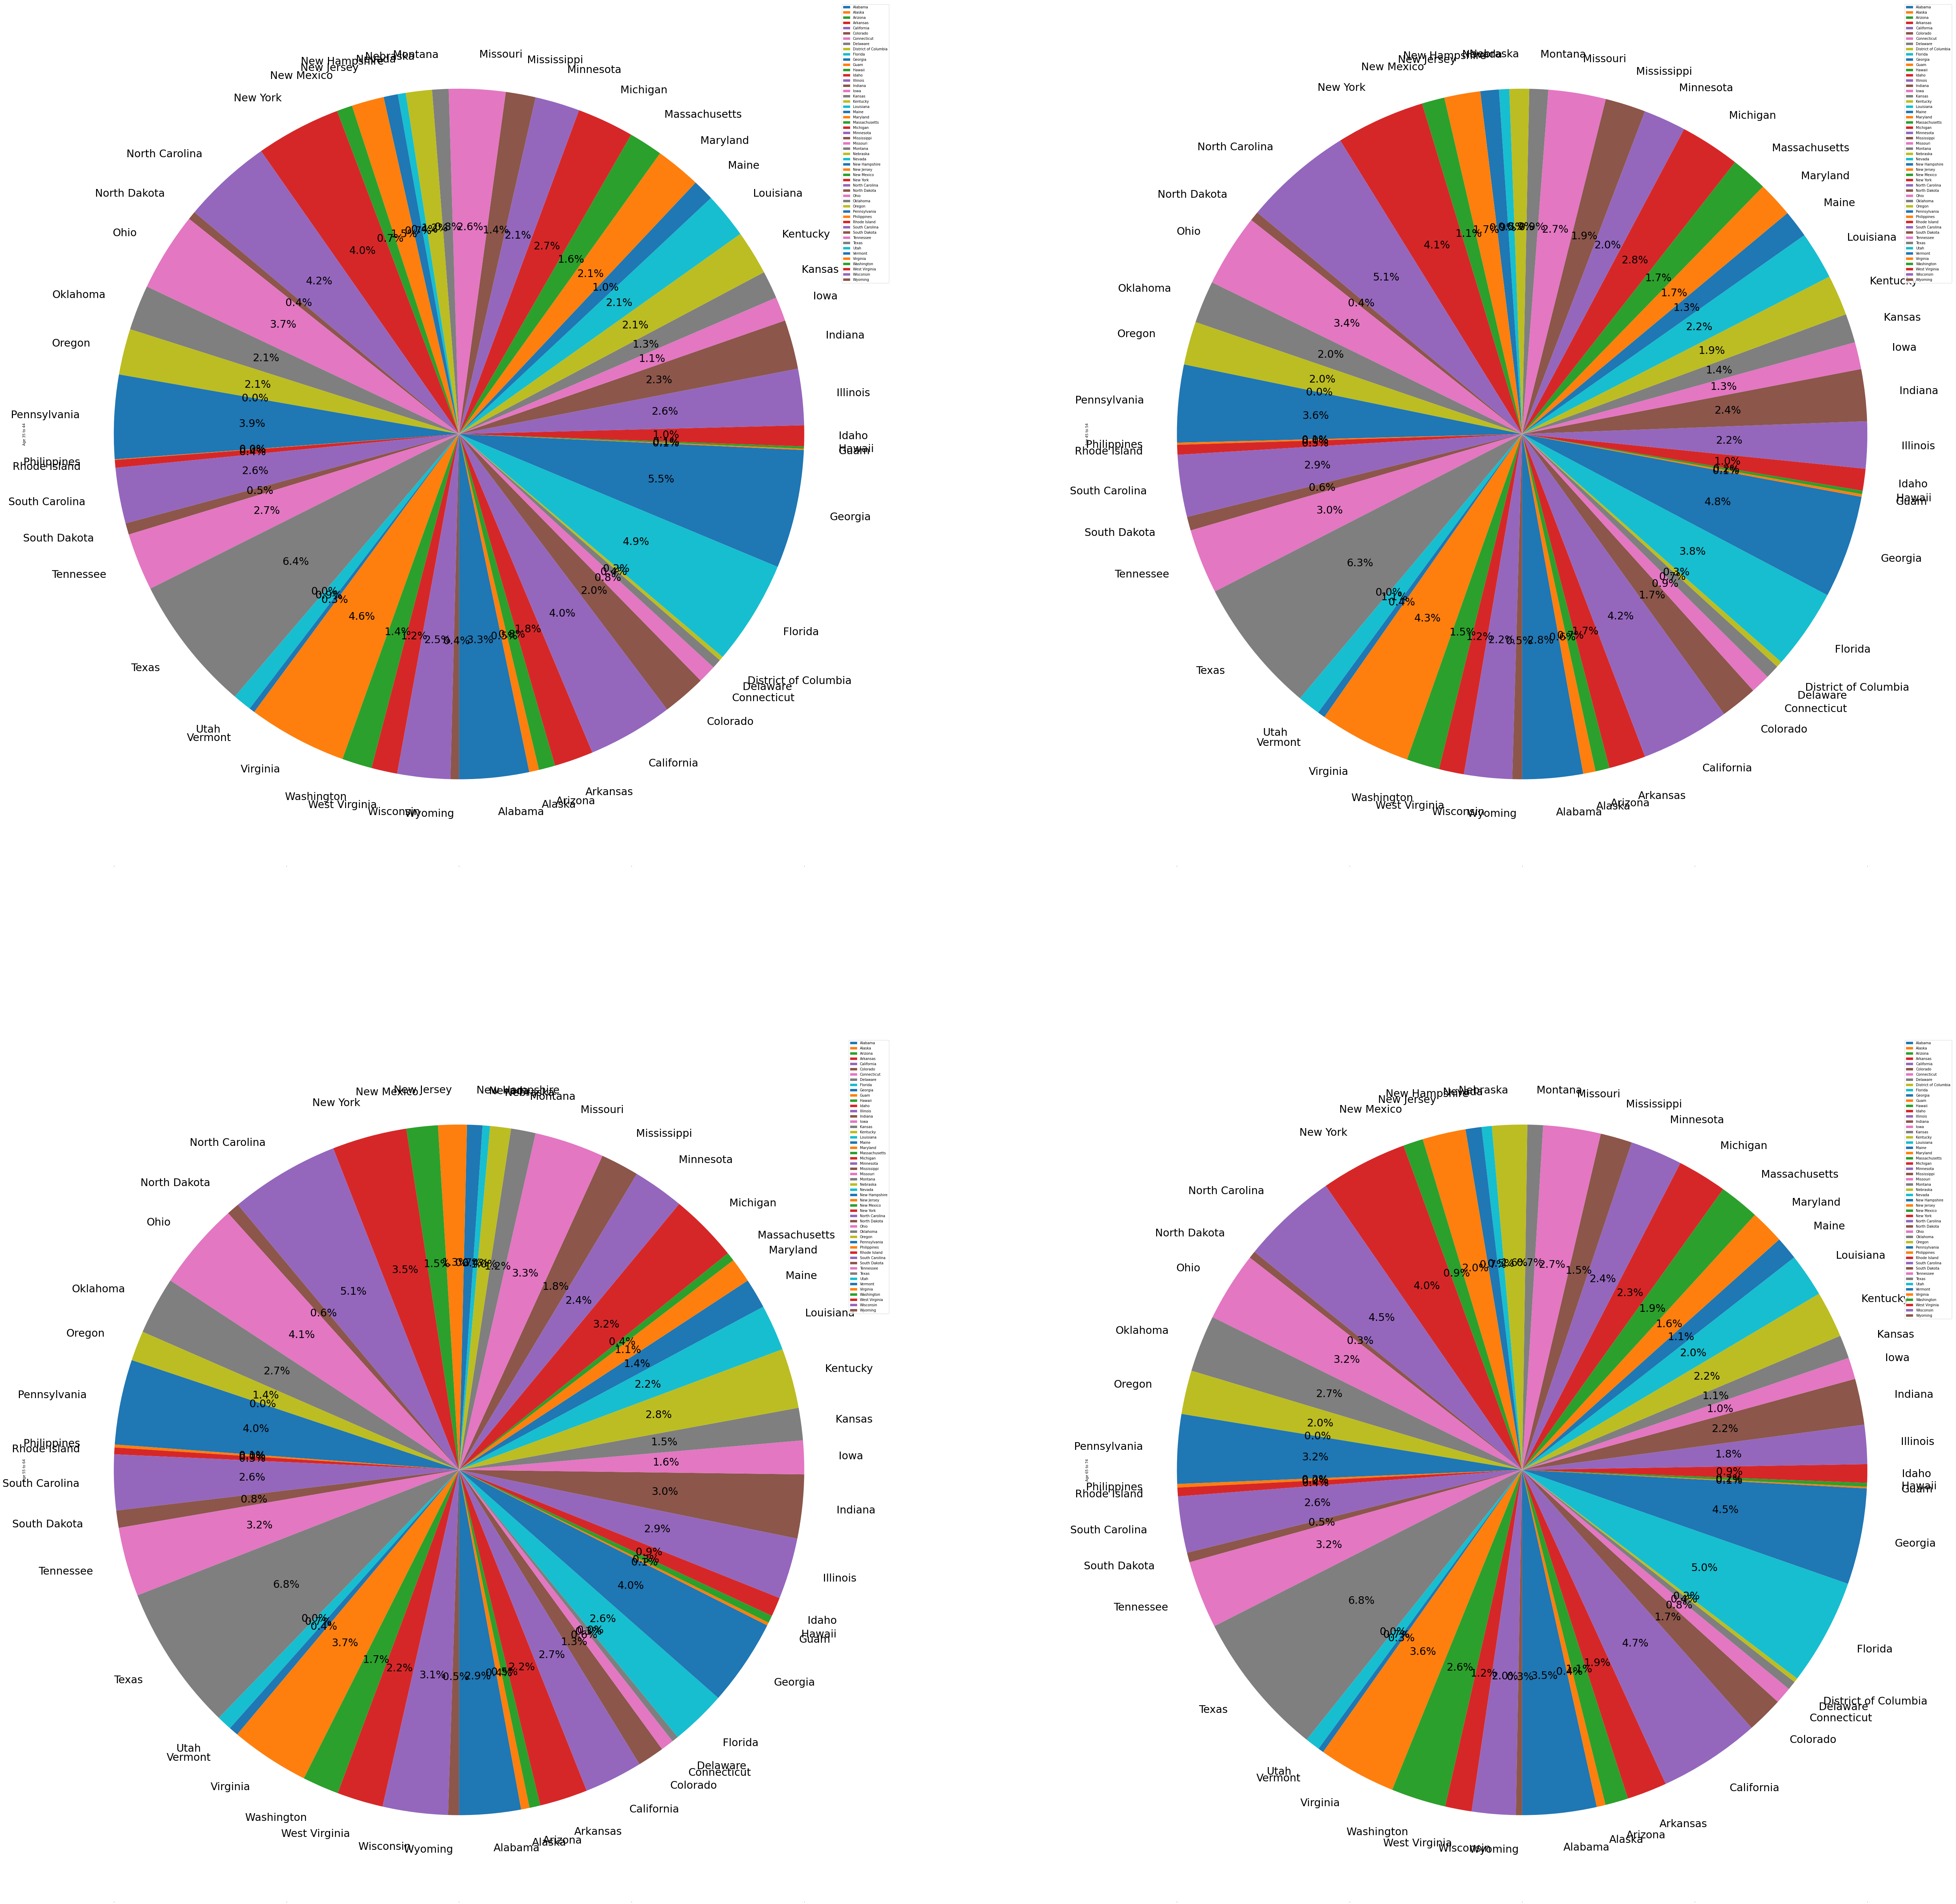

In [8]:
df = pd.DataFrame(out[1:], columns = ['State','Age 35 to 44','Age 45 to 54','Age 55 to 64','Age 65 to 74'])
df['Age 35 to 44'] = df['Age 35 to 44'].astype(int)
df['Age 45 to 54'] = df['Age 45 to 54'].astype(int)
df['Age 55 to 64'] = df['Age 55 to 64'].astype(int)
df['Age 65 to 74'] = df['Age 65 to 74'].astype(int)
df.set_index(['State'], inplace=True)

df.head()
ax=df.plot(kind='pie', subplots=True,
         autopct='%1.1f%%', startangle=270, fontsize=30,
         layout=(2,2), figsize=(100,100))
#for i in range(len(ax)):
#     ax[i].figure.savefig('vetByAge'+str(i)+'.jpg')

In [9]:
#veterans per hospital staff (doctors and nurses) in every state
qres=g.query("""

        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
        prefix fiftyfour: <http://data-gov.tw.rpi.edu/vocab/p/1154/>
        prefix onetwofive: <http://data-gov.tw.rpi.edu/vocab/p/1202/>

        SELECT distinct ?state_abb (xsd:decimal(?veteran_population1) as ?veteran_population2 ) ((xsd:decimal(?staffNur)+ xsd:decimal(?staffPhy))  AS ?div) 
         WHERE { 
             { 
                 SELECT ?state_abb  (SUM(xsd:decimal(?veteran_population)) as ?veteran_population1)
                 WHERE { 

                         ?x fiftyfour:state ?state.
                         ?x fiftyfour:veteran_population ?veteran_population . 
                          bind( substr( ?state, 1, 2 ) as ?state_abb )

                 } 
                 group by ?state_abb 
             } 
             { 
                 SELECT ?state1 (sum(?staffing_nursing1) as ?staffNur)  (sum(?staffing_physicians1) as ?staffPhy)  
                     WHERE { 

                             ?y onetwofive:state ?state1 . 
                             ?y onetwofive:staffing_nursing ?staffing_nursing .
                             BIND(IF(?staffing_nursing = "+", 0, xsd:integer(?staffing_nursing)) as ?staffing_nursing1)
                             ?y onetwofive:staffing_physicians ?staffing_physicians.
                             BIND(IF(?staffing_physicians = "+", 0, xsd:integer(?staffing_physicians)) as ?staffing_physicians1)
                     } 
                     group by ?state1
             } 
              FILTER (?state_abb = ?state1) 
         } 
        ORDER BY ?state_abb
""")

result=[]
for row in qres:
    result.append([row[0],row[1],row[2]])
out=[[0 for _ in range(len(result[0]))] for _ in range(len(result)+1)]
out[0]=['state','veteran population','staff']
for i in range(len(result)):
            result[i] = list(result[i])
            for j in range(len(result[i])):
                    out[i+1][j] = str(result[i][j])
print(out)

[['state', 'veteran population', 'staff'], ['AL', '489175.65', '1222'], ['AR', '824869.72', '1328'], ['CA', '2078267.32', '6545'], ['CO', '671804.62', '745'], ['DE', '79915.54', '288'], ['FL', '1715114.43', '4437'], ['ID', '137202.81', '230'], ['IL', '822104.21', '2622'], ['IN', '509313.43', '1018'], ['MA', '1047299.27', '1492'], ['MI', '1877022.25', '1758'], ['MO', '103729.64', '1440'], ['NE', '2216150.28', '890'], ['OH', '935439.96', '2716'], ['OK', '333876.75', '885'], ['OR', '345872.65', '1218'], ['UT', '156107.42', '554'], ['WA', '640418.65', '1323'], ['WI', '436957.81', '1596'], ['WY', '56140.63', '265']]


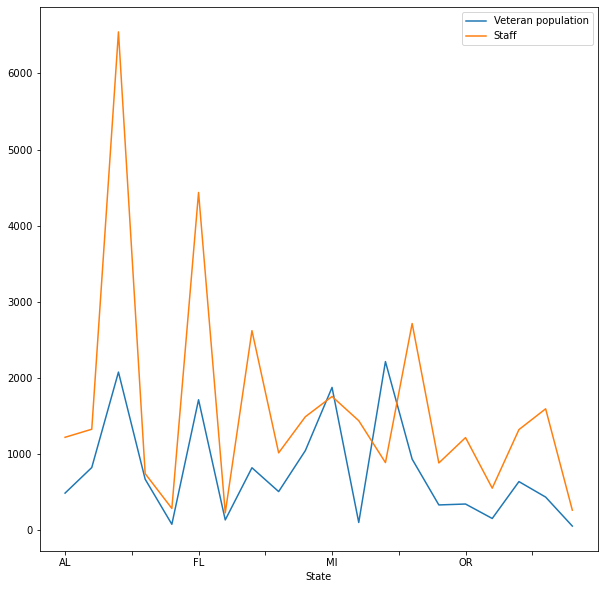

In [10]:

df = pd.DataFrame(out[1:], columns = ['State', 'Veteran population','Staff'])
df['Veteran population'] = df['Veteran population'].astype(float).astype(int)
df['Veteran population'] = df['Veteran population'].div(1000)
df['Staff'] = df['Staff'].astype(int)
df.set_index(['State'], inplace=True)
ax=df.plot.line(figsize=(10,10))
ax.figure.savefig('vetStaff.jpg')


In [11]:
qres=g.query("""
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    PREFIX fiftyfour:<http://data-gov.tw.rpi.edu/vocab/p/1154/>
    PREFIX twentytwo:<http://data-gov.tw.rpi.edu/vocab/p/1204/>
    SELECT ?state1 (xsd:decimal(?veteran_population_2) as ?veteran_population) (xsd:integer(xsd:decimal(?specialty_care_seen)+xsd:decimal(?primary_care_seen)) AS ?Total_cases)
    WHERE { 
        {
            SELECT ?state_abb (sum(xsd:decimal(?vp1154)) AS ?veteran_population_2) 
            WHERE {
                ?s fiftyfour:veteran_population ?vp1154. 
                ?s fiftyfour:state ?state.
                bind( substr( ?state, 1, 2 ) as ?state_abb )
            } group by ?state_abb order by ?state_abb
        }
       {
            SELECT ?state1 (sum(xsd:decimal(?scs30)) AS ?specialty_care_seen) (sum(xsd:decimal(?pcs30)) AS ?primary_care_seen) 
            WHERE {
                ?s1 twentytwo:specialty_care_seen_in_30_days ?scs30. 
                ?s1 twentytwo:primary_care_seen_in_30_days ?pcs30. 
                ?s1 twentytwo:state ?state1.
            } group by ?state1 order by ?state1
        }
      FILTER (?state_abb = ?state1) 
    }
""")
#print(qres)
# qres=g.query("""
#             PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
#      PREFIX fiftyfour:<http://data-gov.tw.rpi.edu/vocab/p/1154/>
#      PREFIX twentytwo:<http://data-gov.tw.rpi.edu/vocab/p/1204/>
#             SELECT ?state1 (sum(xsd:decimal(?scs30)) AS ?specialty_care_seen) (sum(xsd:decimal(?pcs30)) AS ?primary_care_seen) 
#             WHERE {
#                 ?s1 twentytwo:specialty_care_seen_in_30_days ?scs30. 
#                 ?s1 twentytwo:primary_care_seen_in_30_days ?pcs30. 
#                 ?s1 twentytwo:state ?state1.
#             } group by ?state1 order by ?state1""")
result=[]
for row in qres:
    result.append([row[0],row[1],row[2]])
out=[[0 for _ in range(len(result[0]))] for _ in range(len(result)+1)]
out[0]=['state','veteran population','total cases']
for i in range(len(result)):
            result[i] = list(result[i])
            for j in range(len(result[i])):
                    out[i+1][j] = str(result[i][j])
print(out)


[['state', 'veteran population', 'total cases'], ['AL', '489175.65', '592'], ['AR', '824869.72', '396'], ['CA', '2078267.32', '1552'], ['CO', '671804.62', '397'], ['DE', '79915.54', '196'], ['FL', '1715114.43', '1180'], ['ID', '137202.81', '189'], ['IL', '822104.21', '987'], ['IN', '509313.43', '378'], ['MA', '1047299.27', '583'], ['MI', '1877022.25', '948'], ['MO', '103729.64', '783'], ['NE', '2216150.28', '192'], ['OH', '935439.96', '977'], ['OK', '333876.75', '377'], ['OR', '345872.65', '562'], ['UT', '156107.42', '197'], ['WA', '640418.65', '537'], ['WI', '436957.81', '590'], ['WY', '56140.63', '396']]


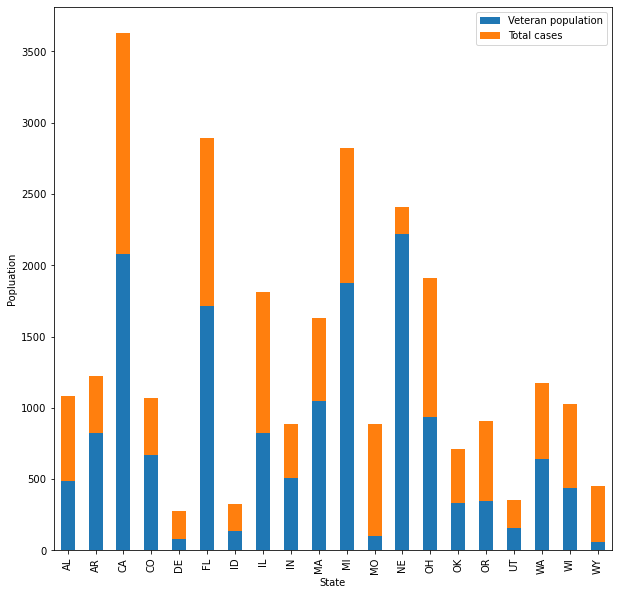

In [12]:

import pandas as pd 

df = pd.DataFrame(out[1:], columns = ['State', 'Veteran population','Total cases'])
df['Veteran population'] = df['Veteran population'].astype(float).astype(int)
df['Veteran population'] = df['Veteran population'].div(1000)
df['Total cases'] = df['Total cases'].astype(int)
df.set_index(['State'], inplace=True)

ax=df.plot.bar(figsize=(10,10),stacked=True)
ax.set_ylabel("Popluation")
ax.figure.savefig('vetCases.jpg')


In [13]:
from flask import Flask, jsonify, request, render_template, url_for
app = Flask(__name__)

@app.route('/populationByState', methods=['GET'])
def sendPopulationByState():
    return jsonify(popByState)

@app.route('/expenditureByState', methods=['GET'])
def sendExpenditureByState():
    return jsonify(expByState)

@app.route('/vetByAge', methods=['GET'])
def sendVetByAge():
    return jsonify(vetByAge)

@app.route('/vetCases', methods=['GET'])
def sendVetCases():
    return jsonify(vetCases)

@app.route('/vetPerStaff', methods=['GET'])
def sendVetPerStaff():
    return jsonify(vetForStaff)


@app.route('/fetch')
def fetch():
    return render_template('test.html')
if _name_ == "__main__":
    app.run()

NameError: name '_name_' is not defined